# What features have the most impact on the price of Toyota Corolla? 
We tried to find insights on the direct impact of features like Fuel, Horse Power, Model, Year etc on the price of the car and fit a regression model to quantify the effects. Our goal was to consider only the most correlated features to help make model design and pricing decisions. 

We predicted Price based on regression and validated our model using step regression. Our choice was based off of how our data set looked like.  Model,Price, Age_08_04, Mfg_Month, Mfg_Year, KM, Fuel_Type, HP, Met_Color, Color, Automatic, CC, Doors, Cylinders, Gears etc are a few of the 39 variables that the data has. 

It is pre cleaned and hence, the rest of the project we will only be coming up with algorithm and the model that fits it the best.

In [ ]:
# Install Packages
install.packages('corrgram')
install.packages('forecast')
install.packages('leaps')
install.packages('ggplot2')
install.packages('broom')

In [ ]:
# Calling Packages
library('corrgram')
library('forecast')
library('leaps')
library('ggplot2')
library('broom')

### An Intuitive Guess 
since, our data is already clean we dont have to worry about outliers. Lets move ahead to find correlation between all the variables. We have about 39 variables and plotting them all at once might be very tricky and defeat the purpose. So lets start off with what we would consider the most and least relevant features in pricing.

#### Age_08_04 , KM,  Fuel_TypeDiesel,  Fuel_TypePetrol, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight             

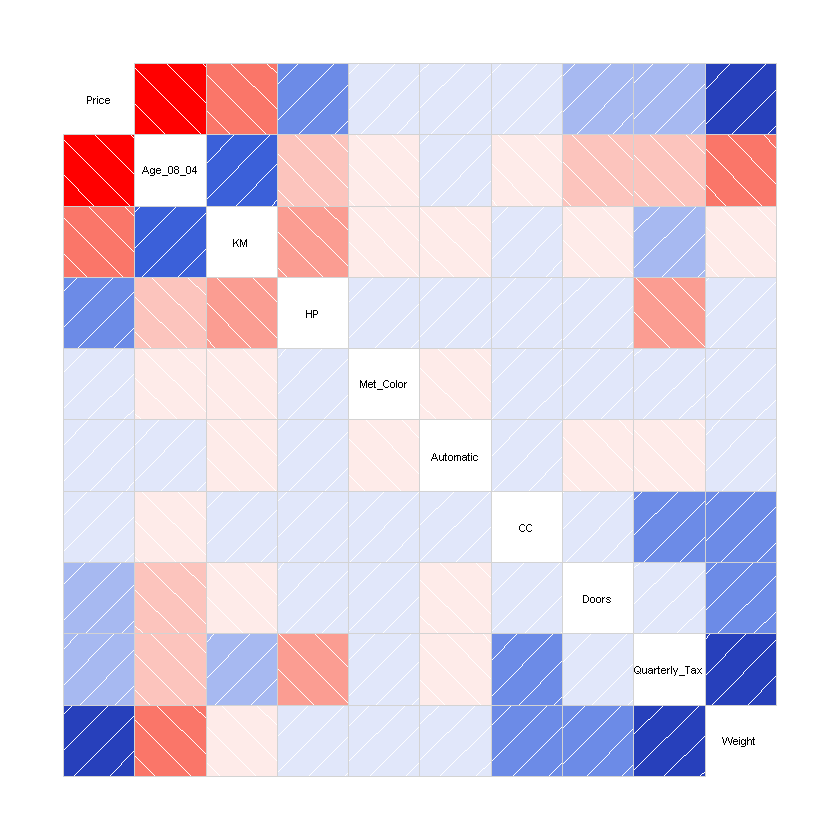

In [18]:
# Read and find correlation
# Put all the guessed features in a variable and used a corrgram
car.df <- read.csv("C:/Users/Sandhya Ravindran/Desktop/r_wd/ToyotaCorolla.csv")
selected.var <- c(3, 4, 7, 8, 9, 10, 12, 13, 14, 17, 18)
car.df.h <- car.df[,c(3, 4, 7, 8, 9, 10, 12, 13, 14, 17, 18)]
correl2 <- cor(car.df.h[sapply(car.df.h, is.numeric)])
corrgram(correl2)

## Data Partition - Test and Train

In [19]:
# set seed for reproducing the partition
set.seed(1)

# partition data
train.index <- sample(c(1:1000), 600)  
train.df <- car.df[train.index, selected.var]
valid.df <- car.df[-train.index, selected.var]

# regression considering all vars
car.lm <- lm(Price ~., data = train.df)
options(scipen = 999)
summary(car.lm)


Call:
lm(formula = Price ~ ., data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8212.5  -839.2   -14.3   831.5  7270.7 

Coefficients:
                    Estimate   Std. Error t value             Pr(>|t|)    
(Intercept)     -1774.877829  1643.744823  -1.080               0.2807    
Age_08_04        -135.430875     4.875906 -27.776 < 0.0000000000000002 ***
KM                 -0.019003     0.002341  -8.116  0.00000000000000283 ***
Fuel_TypeDiesel  1208.339159   534.431400   2.261               0.0241 *  
Fuel_TypePetrol  2425.876714   520.587979   4.660  0.00000391697679667 ***
HP                 38.985537     5.587183   6.978  0.00000000000811621 ***
Met_Color          84.792715   126.883452   0.668               0.5042    
Automatic         306.684154   289.433138   1.060               0.2898    
CC                  0.031966     0.099075   0.323               0.7471    
Doors             -44.157742    64.056530  -0.689               0.4909    
Quarterly_Tax     

## Interpretation
The lower the significance, the higher the correlation to price. Our adjusted R-squared is about 0.854 which is a measure of accuracy. Age of the car, Tax and Weight, KM all have strong correlation to the price.

Fuel_Type Petrol has a strong correlation but, Diesel doesn't. We might be reading too much into it though. Let's plot how far off our predictions from the actuals(or residuals). 

[1] 1

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


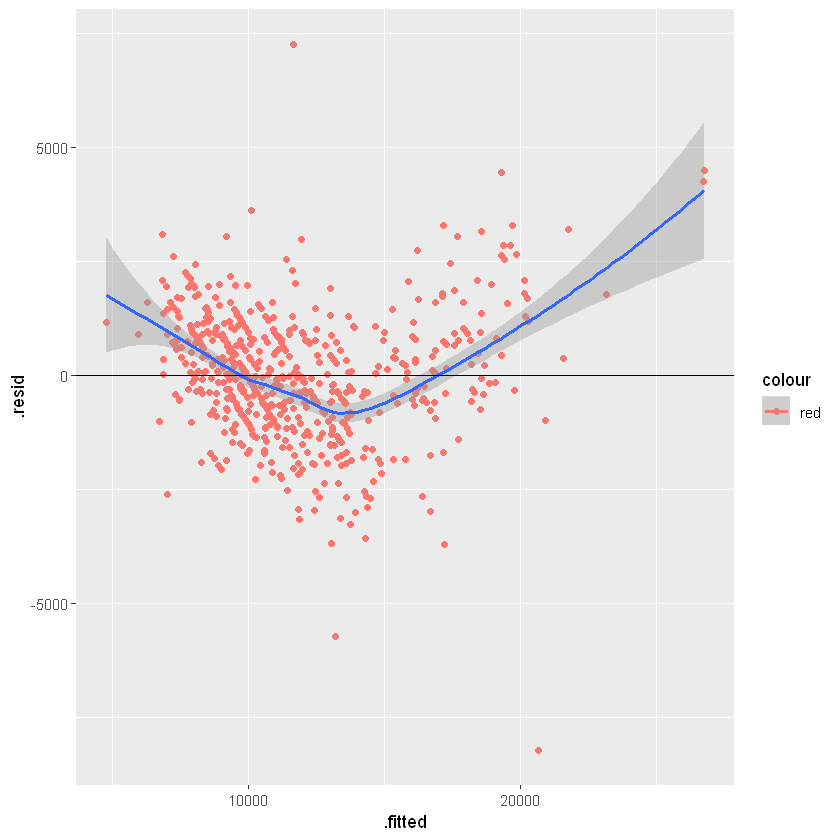

In [25]:
car.lm.pred <- predict(car.lm, valid.df)
all.residuals <- valid.df$Price - car.lm.pred
length(all.residuals[which(all.residuals > -1406 & all.residuals < 1406)])/400
df <- augment(car.lm)

#all.residuals
ggplot(df, aes(x = .fitted, y = .resid, color = 'red')) + geom_point()+geom_smooth(aes(colour = fitted(car.lm), fill = fitted(car.lm)))+geom_hline(yintercept=0)

In [26]:
car.lm.pred <- predict(car.lm, valid.df)
options(scipen=999, digits = 0)
some.residuals <- valid.df$Price[1:20] - car.lm.pred[1:20]
data.frame("Predicted" = car.lm.pred[1:20], "Actual" = valid.df$Price[1:20],
           "Residual" = some.residuals)

,Predicted,Actual,Residual
3,17175,13950,-3225
6,15704,12950,-2754
8,16727,18600,1873
9,20709,21500,791
10,14668,12950,-1718
11,20756,20950,194
13,20743,19600,-1143
16,20592,22000,1408
17,20116,22750,2634
18,16695,17950,1255


In [27]:
accuracy(car.lm.pred, valid.df$Price)

,ME,RMSE,MAE,MPE,MAPE
Test set,304,1334,1027,3,11


In [28]:
# run exhaustive serach
search <- regsubsets(Price ~ ., data = train.df, nbest = 1, nvmax = dim(train.df)[2],
                     method = "exhaustive")
sum <- summary(search)

In [29]:
# show models
sum$which

# show metrics
sum$rsq
sum$adjr2
sum$Cp

(Intercept),Age_08_04,KM,Fuel_TypeDiesel,Fuel_TypePetrol,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE


[1] 1 1 1 1 1 1 1 1 1 1 1

[1] 1 1 1 1 1 1 1 1 1 1 1

NULL

Adjusted R-squared will decreases with more predictors considering the loss of degrees of freedom. Likewise, it will increase as predictors are added if the increase in model fit is worthwhile. Adjusted R-squared should always be used with models with more than one predictor variable. It is interpreted as the proportion of total variance that is explained by the model. 

Our adjusted r-square reaches its maximum when it reaches 0.854, after which it decreases. 

In [32]:
car.lm.step <- step(car.lm, direction = "both")
summary(car.lm.step)  
car.lm.step.pred <- predict(car.lm.step, valid.df)
accuracy(car.lm.step.pred, valid.df$Price)

Start:  AIC=8710
Price ~ Age_08_04 + KM + Fuel_Type + HP + Met_Color + Automatic + 
    CC + Doors + Quarterly_Tax + Weight

                Df  Sum of Sq        RSS  AIC
- CC             1     205921 1163353408 8709
- Met_Color      1     883415 1164030901 8709
- Doors          1     940036 1164087522 8709
- Automatic      1    2220975 1165368462 8710
<none>                        1163147487 8710
- Fuel_Type      2   45912159 1209059646 8730
- Quarterly_Tax  1   81221965 1244369451 8749
- HP             1   96311621 1259459107 8756
- KM             1  130298929 1293446416 8772
- Weight         1  134438616 1297586103 8774
- Age_08_04      1 1526097385 2689244872 9211

Step:  AIC=8709
Price ~ Age_08_04 + KM + Fuel_Type + HP + Met_Color + Automatic + 
    Doors + Quarterly_Tax + Weight

                Df  Sum of Sq        RSS  AIC
- Met_Color      1     903466 1164256874 8707
- Doors          1     912544 1164265951 8707
- Automatic      1    2574040 1165927447 8708
<none>             


Call:
lm(formula = Price ~ Age_08_04 + KM + Fuel_Type + HP + Quarterly_Tax + 
    Weight, data = train.df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8263   -825      1    839   7312 

Coefficients:
                   Estimate  Std. Error t value             Pr(>|t|)    
(Intercept)     -1853.36897  1620.35672   -1.14                0.253    
Age_08_04        -135.72630     4.83995  -28.04 < 0.0000000000000002 ***
KM                 -0.01912     0.00233   -8.19   0.0000000000000016 ***
Fuel_TypeDiesel  1179.35368   526.25097    2.24                0.025 *  
Fuel_TypePetrol  2374.05722   517.80593    4.58   0.0000055461532557 ***
HP                 39.27366     5.51783    7.12   0.0000000000031903 ***
Quarterly_Tax      16.43837     2.58633    6.36   0.0000000004140248 ***
Weight             12.74441     1.47320    8.65 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0 '**' 0 '*' 0 '.' 0 ' ' 1

Residual standard error: 1400 on 592 degrees of freedom
Multiple R-squared:  0.8

,ME,RMSE,MAE,MPE,MAPE
Test set,317,1341,1036,3,11


RMSE is slightly higher in our model. However taking into consideration our problem statement, R-squared, other error values and bias-variance tradeoff 2nd model would be a correct choice.   

#### Age_08_04 , KM,  Fuel_TypeDiesel,  Fuel_TypePetrol, HP, Quarterly_Tax, Weight have the most impact on the price. 

![alt text](https://media.giphy.com/media/EIK9lgIXSVPJm/giphy.gif)